In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# files to load
city_data_to_load = os.path.join('Resources', 'city_data.csv')
ride_data_to_load = os.path.join('Resources', 'ride_data.csv')
# Read the files in DataFrames
city_data_df = pd.read_csv(city_data_to_load)
city_data_df, city_data_df.dtypes

(                city  driver_count   type
 0        Richardfort            38  Urban
 1       Williamsstad            59  Urban
 2        Port Angela            67  Urban
 3         Rodneyfort            34  Urban
 4        West Robert            39  Urban
 ..               ...           ...    ...
 115     Bradshawfurt             7  Rural
 116     New Ryantown             2  Rural
 117   Randallchester             9  Rural
 118      Jessicaport             1  Rural
 119  South Saramouth             7  Rural
 
 [120 rows x 3 columns],
 city            object
 driver_count     int64
 type            object
 dtype: object)

In [3]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df, ride_data_df.dtypes

(                    city                 date   fare        ride_id
 0     Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873
 1     South Michelleport  2019-03-04 18:24:09  30.24  2343912425577
 2     Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003
 3             Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178
 4             South Jack  2019-03-06 04:28:35  34.58  3908451377344
 ...                  ...                  ...    ...            ...
 2370         Michaelberg  2019-04-29 17:04:39  13.38  8550365057598
 2371     Lake Latoyabury  2019-01-30 00:05:47  20.76  9018727594352
 2372         North Jaime  2019-02-10 21:03:50  11.11  2781339863778
 2373        West Heather  2019-05-07 19:22:15  44.94  4256853490277
 2374          Newtonview  2019-04-25 10:20:13  55.84  9990581345298
 
 [2375 rows x 4 columns],
 city        object
 date        object
 fare       float64
 ride_id      int64
 dtype: object)

In [4]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [5]:
ride_data_df['city'].nunique(), city_data_df['type'].unique()

(120, array(['Urban', 'Suburban', 'Rural'], dtype=object))

In [6]:
# get the number of data points for the urban cities
sum(city_data_df['type']=='Urban'), sum(city_data_df['type']=='Suburban'), sum(city_data_df['type']=='Rural')

(66, 36, 18)

In [7]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on=['city', 'city'])
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [8]:
average_fare = pyber_data_df.groupby('city').mean()['fare']
total_rides = pyber_data_df.groupby('city').count()['ride_id']
number_of_drivers = pyber_data_df.groupby('city').mean()['driver_count']
average_fare, total_rides, number_of_drivers

(city
 Amandaburgh         24.641667
 Barajasview         25.332273
 Barronchester       36.422500
 Bethanyland         32.956111
 Bradshawfurt        40.064000
                       ...    
 West Robert         25.123871
 West Samuelburgh    21.767600
 Williamsonville     31.875000
 Williamsstad        24.362174
 Williamsview        26.599000
 Name: fare, Length: 120, dtype: float64,
 city
 Amandaburgh         18
 Barajasview         22
 Barronchester       16
 Bethanyland         18
 Bradshawfurt        10
                     ..
 West Robert         31
 West Samuelburgh    25
 Williamsonville     14
 Williamsstad        23
 Williamsview        20
 Name: ride_id, Length: 120, dtype: int64,
 city
 Amandaburgh         12.0
 Barajasview         26.0
 Barronchester       11.0
 Bethanyland         22.0
 Bradshawfurt         7.0
                     ... 
 West Robert         39.0
 West Samuelburgh    73.0
 Williamsonville      2.0
 Williamsstad        59.0
 Williamsview        46.0
 Name:

In [9]:
urban_cities_df = pyber_data_df[pyber_data_df['type']=='Urban']
suburban_cities_df = pyber_data_df[pyber_data_df['type']=='Suburban']
rural_cities_df = pyber_data_df[pyber_data_df['type']=='Rural']
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [10]:
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

In [11]:
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

In [12]:
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']

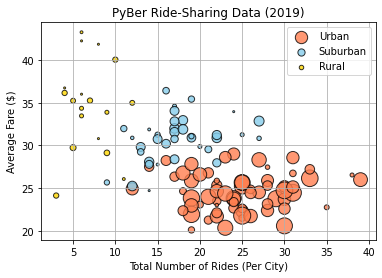

In [13]:
fig, ax = plt.subplots()
ax.scatter(urban_ride_count, 
           urban_avg_fare, 
           s=urban_driver_count*4, 
           facecolors='coral', 
           edgecolors='black', 
           alpha=0.8, label='Urban', 
           linewidth=1)
ax.scatter(suburban_ride_count, 
           suburban_avg_fare, 
           s=suburban_driver_count*4, 
           facecolors='skyblue', 
           edgecolors='black', 
           alpha=0.8, 
           label='Suburban', 
           linewidth=1)
ax.scatter(rural_ride_count, 
           rural_avg_fare, 
           s=rural_driver_count*4, 
           facecolors='gold', 
           edgecolors='black', 
           alpha=0.8, 
           label='Rural', 
           linewidth=1)
ax.set_title('PyBer Ride-Sharing Data (2019)')
ax.set_xlabel('Total Number of Rides (Per City)')
ax.set_ylabel('Average Fare ($)')
ax.grid()
ax.legend()
plt.show()

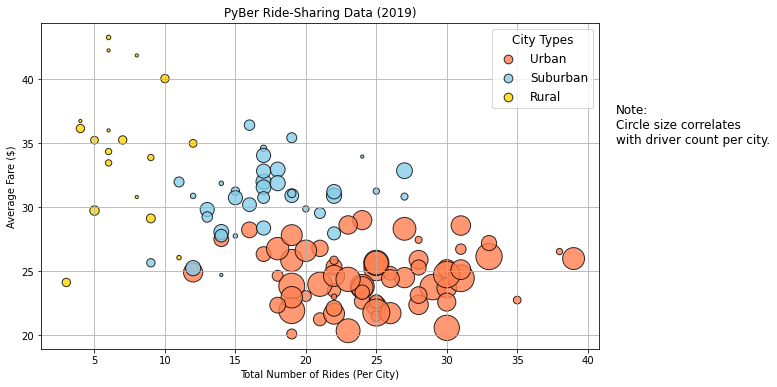

<Figure size 432x288 with 0 Axes>

In [61]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(urban_ride_count, 
           urban_avg_fare, 
           s=urban_driver_count*10, 
           facecolors='coral', 
           edgecolors='black', 
           alpha=0.8, label='Urban', 
           linewidth=1)
ax.scatter(suburban_ride_count, 
           suburban_avg_fare, 
           s=suburban_driver_count*10, 
           facecolors='skyblue', 
           edgecolors='black', 
           alpha=0.8, 
           label='Suburban', 
           linewidth=1)
ax.scatter(rural_ride_count, 
           rural_avg_fare, 
           s=rural_driver_count*10, 
           facecolors='gold', 
           edgecolors='black', 
           alpha=0.8, 
           label='Rural', 
           linewidth=1)
ax.set_title('PyBer Ride-Sharing Data (2019)')
ax.set_xlabel('Total Number of Rides (Per City)')
ax.set_ylabel('Average Fare ($)')
ax.grid()
lgnd = ax.legend(fontsize='12',
                mode='Expanded',
                scatterpoints=1,
                loc='best', # The location setting, loc=, for the legend is where it will fit the "best" based on the plotting of the data points.
                title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.
ax.text(42, 35, 'Note:\nCircle size correlates\nwith driver count per city.', fontsize='12')
plt.show()
plt.savefig('analysis/Fig1.png')

In [15]:
urban_cities_df.describe(), suburban_cities_df.describe(), rural_cities_df.describe()

(              fare       ride_id  driver_count
 count  1625.000000  1.625000e+03   1625.000000
 mean     24.525772  4.873485e+12     36.678154
 std      11.738649  2.907440e+12     20.075545
 min       4.050000  1.458810e+10      3.000000
 25%      14.550000  2.400244e+12     22.000000
 50%      24.640000  4.711188e+12     37.000000
 75%      34.580000  7.451579e+12     52.000000
 max      44.970000  9.991538e+12     73.000000,
              fare       ride_id  driver_count
 count  625.000000  6.250000e+02    625.000000
 mean    30.970128  4.971015e+12     13.712000
 std     10.677508  2.912410e+12      8.042372
 min     12.050000  3.218337e+08      1.000000
 25%     21.970000  2.364253e+12      5.000000
 50%     30.750000  5.053221e+12     16.000000
 75%     39.830000  7.551674e+12     21.000000
 max     49.960000  9.917744e+12     25.000000,
              fare       ride_id  driver_count
 count  125.000000  1.250000e+02    125.000000
 mean    34.623440  4.647746e+12      4.296000
 s

In [16]:
urban_ride_count.describe(), suburban_ride_count.describe(), rural_ride_count.describe()

(count    66.000000
 mean     24.621212
 std       5.408726
 min      12.000000
 25%      21.000000
 50%      24.000000
 75%      28.000000
 max      39.000000
 Name: ride_id, dtype: float64,
 count    36.000000
 mean     17.361111
 std       4.323707
 min       9.000000
 25%      14.000000
 50%      17.000000
 75%      19.250000
 max      27.000000
 Name: ride_id, dtype: float64,
 count    18.000000
 mean      6.944444
 std       2.508157
 min       3.000000
 25%       5.250000
 50%       6.000000
 75%       8.750000
 max      12.000000
 Name: ride_id, dtype: float64)

In [17]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [18]:
suburban_ride_count.mode()

0    17
dtype: int64

In [24]:
import numpy as np
import scipy.stats as sts

In [26]:
# calculate the measures of central tendency for the ride count for the urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")


The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [29]:
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [30]:
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [31]:
# get the fares for the urban cities.
urban_fares = urban_cities_df['fare']
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [34]:
# calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")
median_urban_fares = np.median(urban_fares)
print(f"The mean fare price for urban trips is ${median_urban_fares}.")
mode_urban_fares = sts.mode(urban_fares)
print(f"The mean fare price for urban trips is ${mode_urban_fares}.")


The mean fare price for urban trips is $24.53.
The mean fare price for urban trips is $24.64.
The mean fare price for urban trips is $ModeResult(mode=array([22.86]), count=array([5])).


In [37]:
mean_suburban_fares = np.mean(suburban_cities_df['fare'])
mean_rural_fares = np.mean(rural_cities_df['fare'])
mean_suburban_fares, mean_rural_fares

(30.970128000000003, 34.623439999999995)

In [42]:
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

In [45]:
mean_urban_drivers = np.mean(urban_drivers)
median_urban_drivers = np.median(urban_drivers)
mode_urban_drivers = sts.mode(urban_drivers)

mean_suburban_drivers = np.mean(suburban_drivers)
median_suburban_drivers = np.median(suburban_drivers)
mode_suburban_drivers = sts.mode(suburban_drivers)

mean_rural_drivers = np.mean(rural_drivers)
median_rural_drivers = np.median(rural_drivers)
mode_rural_drivers = sts.mode(rural_drivers)

mean_suburban_drivers

13.712

C:\Anaconda3\envs\databootcamp\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


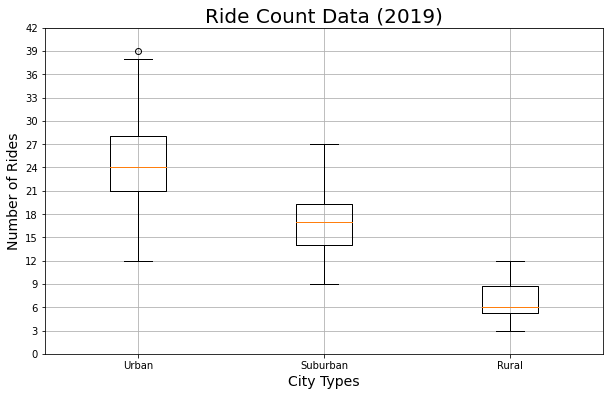

<Figure size 432x288 with 0 Axes>

In [62]:
# create a box-and-whisker plot for the urban cities ride count
x_labels = ['Urban', 'Suburban', 'Rural']
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(ride_count_data, labels=x_labels)
# add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0,45,step=3.0))
ax.grid()
plt.show()
plt.savefig('analysis/Fig2.png')

In [69]:
# Get the city that matches 39
urban_city_outlier = urban_ride_count[urban_ride_count==max(urban_ride_count)].index[0]
print(f'{urban_city_outlier} has the highest ride count.')

West Angela has the highest ride count.


C:\Anaconda3\envs\databootcamp\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


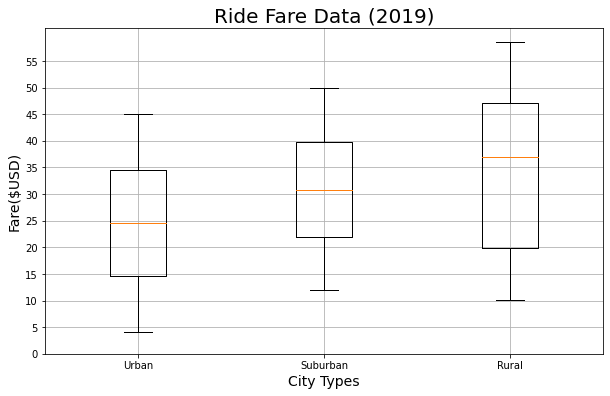

<Figure size 432x288 with 0 Axes>

In [76]:
# create a box-and-whisker plot for the ride fares
urban_fares = urban_cities_df['fare']
suburban_fares = suburban_cities_df['fare']
rural_fares = rural_cities_df['fare']

x_labels = ['Urban', 'Suburban', 'Rural']
fares_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(fares_data, labels=x_labels)
# add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fare($USD)', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0,56,step=5.0))
ax.grid()
plt.show()
plt.savefig('analysis/Fig3.png')

C:\Anaconda3\envs\databootcamp\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


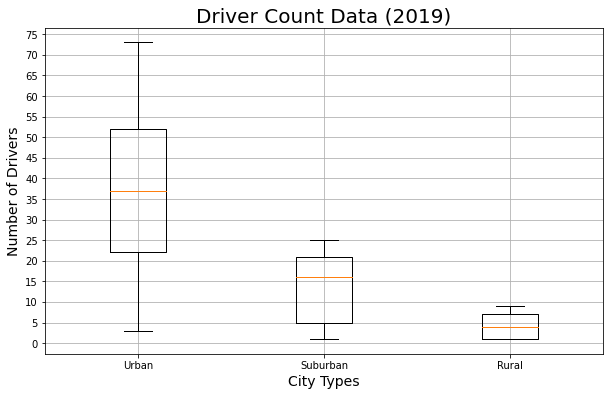

<Figure size 432x288 with 0 Axes>

In [84]:
# create a box-and-whisker plot for the driver counts
x_labels = ['Urban', 'Suburban', 'Rural']
drivers_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(drivers_data, labels=x_labels)
# add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Drivers', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0,76,step=5.0))
#ax.set_ylim(0,75)
ax.grid()
plt.show()
plt.savefig('analysis/Fig4.png')

In [86]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(['type']).sum()['fare']
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [87]:
total_fares = pyber_data_df['fare'].sum()
total_fares

63538.64

In [88]:
# calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

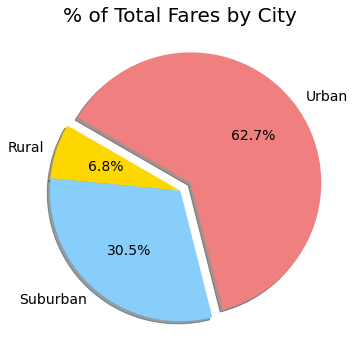

<Figure size 432x288 with 0 Axes>

In [105]:
# Build the percentage of fares by city type pie chart.
labels = ['Rural', 'Suburban', 'Urban']
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(type_percents, 
      labels=labels,
      colors=['gold', 'lightskyblue','lightcoral'],
      explode=[0, 0, 0.1],
      autopct='%1.1f%%',
      shadow=True, startangle=150)
ax.set_title('% of Total Fares by City', fontsize=20)
# change the default font size from 10 to 14
plt.rcParams['font.size'] = 14
plt.show()
plt.savefig('analysis/Fig5.png')

In [107]:
# calculate the percentage of rides for each city type.
ride_percents = 100 * pyber_data_df.groupby('type').count()['ride_id'] / pyber_data_df['ride_id'].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

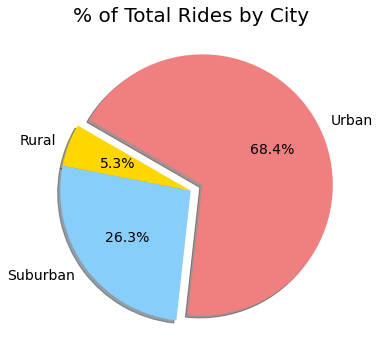

<Figure size 432x288 with 0 Axes>

In [108]:
# Build the percentage of rides by city type pie chart.
labels = ['Rural', 'Suburban', 'Urban']
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(ride_percents, 
      labels=labels,
      colors=['gold', 'lightskyblue','lightcoral'],
      explode=[0, 0, 0.1],
      autopct='%1.1f%%',
      shadow=True, startangle=150)
ax.set_title('% of Total Rides by City', fontsize=20)
# change the default font size from 10 to 14
plt.rcParams['font.size'] = 14
plt.show()
plt.savefig('analysis/Fig6.png')